In [1]:
# DELETE BEFORE SUBMITING
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MATEJ/cs320/s22/p2_new/mp2
%ls

Mounted at /content/drive
/content/drive/MyDrive/MATEJ/cs320/s22/p2_new/mp2
 banks.json              module_tester.py   mp2.md         README.md       wi.zip
 build-project.py        mp2.csv           'p2 for git'/   README_old.md
 grading-guidelines.md   mp2.ipynb          __pycache__/   search.py
 loans.py                mp2-key.csv        q6.png         tester.py
 module_tester_old.py    mp2-key_old.csv    q7.png         test.json


In [2]:
# project: p2
# submitter: popovski
# partner: none
# hours: 10

In [3]:
import loans
%load_ext autoreload
%autoreload 2

import search
%load_ext autoreload
%autoreload 2

import json
from io import TextIOWrapper
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(100000)

1000


In [5]:
ssb = loans.Bank("Charles Schwab Bank, SSB")
ssb.load_from_zip("wi.zip")

In [6]:
#Q1

ssb.average_interest_rate()

2.957772277227724

In [7]:
#Q2

ssb.applicants_per_loan_on_average()

1.7227722772277227

In [8]:
#Q3

ssb.ages_dict()

{'25-34': 5, '35-44': 25, '45-54': 36, '55-64': 55, '65-74': 41, '>74': 12}

In [9]:
#Q4

t = search.BST()
for l in ssb.loans:
    t.add(l.interest_rate, l)

len(t[-1])

1

In [10]:
#Q5

t.get_height(t.root)

9

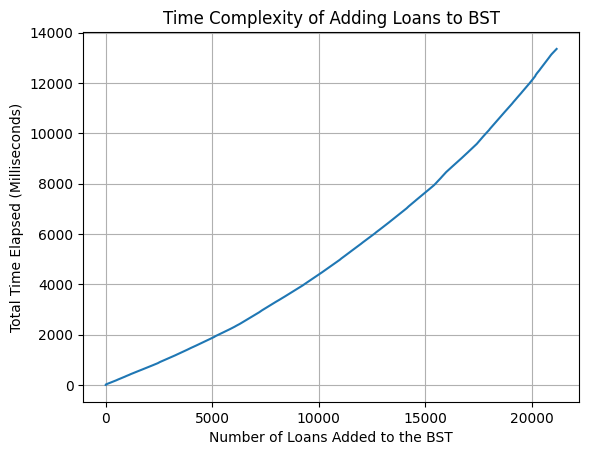

In [11]:
#Q6

uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu.load_from_zip("wi.zip")

times_df = pd.DataFrame(dtype = float)

t = search.BST()
t0 = time.time()
counter = 0

for l in uwcu.loans:
    t.add(l.interest_rate, l)
    counter += 1
    t1 = time.time()
    running_time = (t1 - t0) * 1000
    times_df.at[counter, "Time"] = running_time

df = times_df.plot.line(legend = False)
df.set_xlabel("Number of Loans Added to the BST")
df.set_ylabel("Total Time Elapsed (Milliseconds)")
plt.title('Time Complexity of Adding Loans to BST')
plt.grid(True)
None

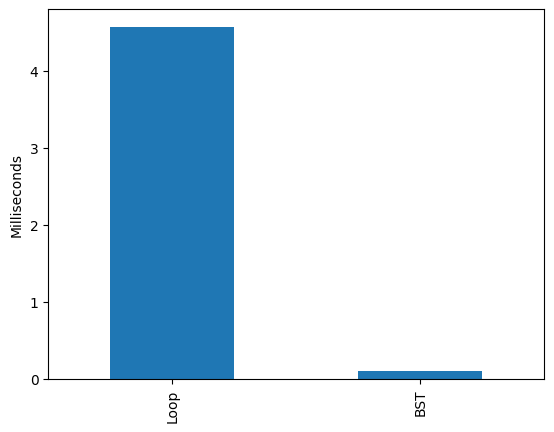

In [12]:
#Q7

t2_df = pd.DataFrame(dtype = float)

count = 0
t0 = time.time()
for l in uwcu.loans:
    if l.interest_rate == -1:
        count += 1
t1 = time.time()
dif = (t1 - t0) * 1000
t2_df.at["Loop", time] = dif

t0 = time.time()
bst = len(t[-1])
t1 = time.time()
diff = (t1- t0) * 1000
t2_df.at["BST", time] = diff

df = t2_df.plot.bar(legend = False)
df.set_ylabel("Milliseconds")
None

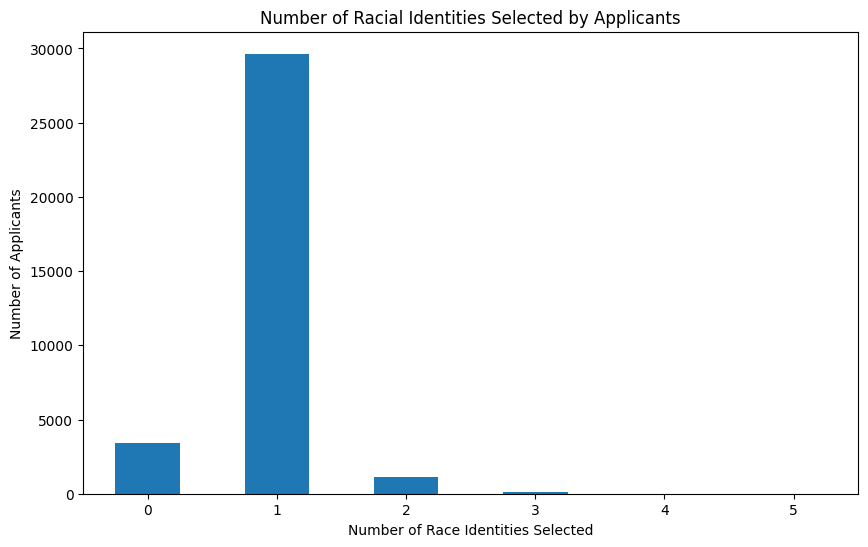

In [13]:
#Q8

number_of_races = uwcu.list_of_numbers_of_racial_identities()
number_of_races_counts = pd.Series(number_of_races).value_counts().sort_index()

plt.figure(figsize=(10, 6))
number_of_races_counts.plot(kind='bar')
plt.xlabel('Number of Race Identities Selected')
plt.ylabel('Number of Applicants')
plt.title('Number of Racial Identities Selected by Applicants')
plt.xticks(rotation=0)
plt.show()
None

In [14]:
t = search.BST()
for l in uwcu.loans:
    t.add(l.interest_rate, l)

In [15]:
#Q9

number_of_nodes = t.node_counter(t.root)
number_of_non_leaf_nodes = t.num_nonleaf_nodes(t.root)
root = 1
number_of_nodes - number_of_non_leaf_nodes

9

In [16]:
#Q10

fourth_largest_interest_rates = t.top_n_keys(4, t.root)
fourth_largest_interest_rates[-1]

5.0